In [12]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

import scripts as s
importlib.reload(s)

<module 'scripts' from '/Users/alfred/Documents/interpolation/scripts.py'>

In [3]:
catmullrom = 0.5 * np.array([[-1, 3, -3, 1],
                             [2, -5, 4, -1],
                             [-1, 0, 1, 0],
                             [0, 2, 0, 0]])

In [44]:
interpolation_count = 10
number_of_keyframes = 4
keyframes = np.random.randint(-100, 100, size=number_of_keyframes)
time = np.power(np.linspace([0, 0, 0, 0],
                            [1, 1, 1, 1],
                            num=interpolation_count),
                     range(3, -1, -1))

keyframes[:, None], time

(array([[-87],
        [-34],
        [-93],
        [-37]]),
 array([[0.        , 0.        , 0.        , 1.        ],
        [0.00137174, 0.01234568, 0.11111111, 1.        ],
        [0.01097394, 0.04938272, 0.22222222, 1.        ],
        [0.03703704, 0.11111111, 0.33333333, 1.        ],
        [0.0877915 , 0.19753086, 0.44444444, 1.        ],
        [0.17146776, 0.30864198, 0.55555556, 1.        ],
        [0.2962963 , 0.44444444, 0.66666667, 1.        ],
        [0.47050754, 0.60493827, 0.77777778, 1.        ],
        [0.70233196, 0.79012346, 0.88888889, 1.        ],
        [1.        , 1.        , 1.        , 1.        ]]))

In [45]:
interpolated_points = time @ catmullrom @ keyframes[:, None]
interpolated_points

array([[-34.        ],
       [-36.2702332 ],
       [-41.7914952 ],
       [-49.62962963],
       [-58.85048011],
       [-68.51989026],
       [-77.7037037 ],
       [-85.46776406],
       [-90.87791495],
       [-93.        ]])

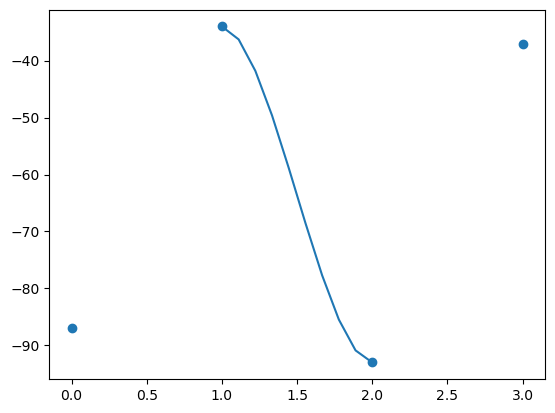

In [46]:
plt.scatter(np.arange(number_of_keyframes, dtype=np.float64), keyframes)
plt.plot(np.linspace(1, 2, num=interpolation_count), interpolated_points)

In [22]:
interpolation_count = 100
number_of_points = 4
keyframes_x = np.random.randint(-100, 101, size=(number_of_points,))
keyframes_y = np.random.randint(-100, 101, size=(number_of_points,))
gradients_x = np.random.randint(-100, 101, size=(number_of_points,))
gradients_y = np.random.randint(-100, 101, size=(number_of_points,))
catmullrom = 0.5 * np.array([[-1, 3, -3, 1],
                             [2, -5, 4, -1],
                             [-1, 0, 1, 0],
                             [0, 2, 0, 0]])

hermite = np.array([[2, -2, 1, 1],
                    [-3, 3, -2, -1],
                    [0, 0, 1, 0],
                    [1, 0, 0, 0]])

np.stack((keyframes_x, keyframes_y), axis=0)

array([[-71,   1,  74, -22],
       [-93, -44, -65, -94]])

In [23]:
catmullrom_interpolated_points_x = (np.power(np.linspace([0, 0, 0, 0], [1, 1, 1, 1], num=interpolation_count), [3, 2, 1, 0]) 
                                    @ catmullrom 
                                    @ np.stack((keyframes_x[:-3], keyframes_x[1:-2], keyframes_x[2:-1], keyframes_x[3:]), axis=0))
catmullrom_interpolated_points_y = (np.power(np.linspace([0, 0, 0, 0], [1, 1, 1, 1], num=interpolation_count), [3, 2, 1, 0]) 
                                    @ catmullrom 
                                    @ np.stack((keyframes_y[:-3], keyframes_y[1:-2], keyframes_y[2:-1], keyframes_y[3:]), axis=0))

hermite_interpolated_points_x = (np.power(np.linspace([0, 0, 0, 0], [1, 1, 1, 1], num=interpolation_count), [3, 2, 1, 0]) 
                                 @ hermite
                                 @ np.stack((keyframes_x[:-1], keyframes_x[1:], gradients_x[:-1], gradients_x[1:]), axis=0))
hermite_interpolated_points_y = (np.power(np.linspace([0, 0, 0, 0], [1, 1, 1, 1], num=interpolation_count), [3, 2, 1, 0]) 
                                 @ hermite
                                 @ np.stack((keyframes_y[:-1], keyframes_y[1:], gradients_y[:-1], gradients_y[1:]), axis=0))

array([[-71, -93],
       [  1, -44],
       [ 74, -65],
       [-22, -94]])

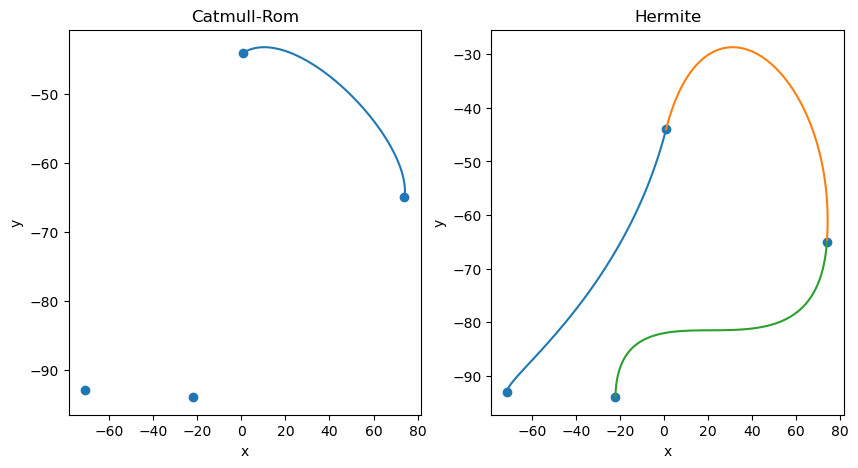

In [24]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].scatter(keyframes_x, keyframes_y)
axes[0].plot(catmullrom_interpolated_points_x, catmullrom_interpolated_points_y)
axes[0].set_title("Catmull-Rom")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

axes[1].scatter(keyframes_x, keyframes_y)
axes[1].plot(hermite_interpolated_points_x, hermite_interpolated_points_y)
axes[1].set_title("Hermite")
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')

np.stack((keyframes_x, keyframes_y), axis=1)

Text(0, 0.5, 'y')

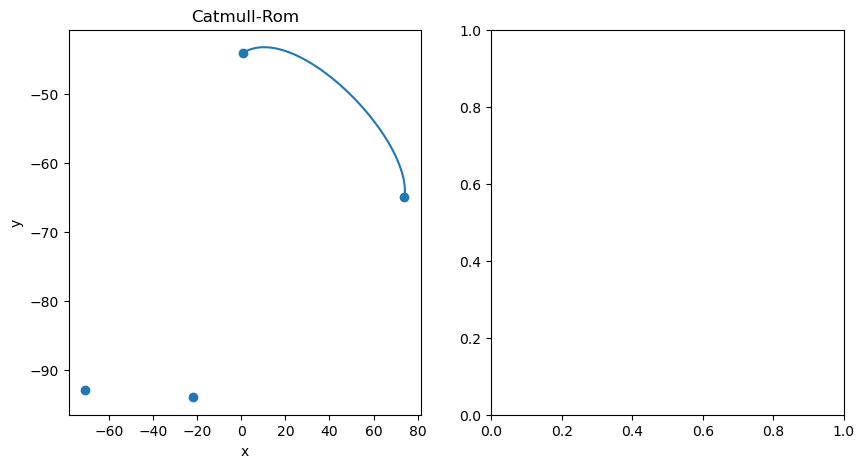

In [25]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].scatter(keyframes_x, keyframes_y)
axes[0].plot(s.catmullrom_interpolation_1d(keyframes_x, interpolation_count), s.catmullrom_interpolation_1d(keyframes_y, interpolation_count))
axes[0].set_title("Catmull-Rom")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

In [17]:
np.concatenate((np.zeros(shape=(1,)), [0], [0]))

array([0., 0., 0.])

In [20]:
gradients_x = np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_x[2:], 
                              np.zeros(shape=(1,)))) - np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_x[:-2], 
                              np.zeros(shape=(1,))))
gradients_y = np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_y[2:], 
                              np.zeros(shape=(1,)))) - np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_y[:-2], 
                              np.zeros(shape=(1,))))
gradients_x, gradients_y

(array([  0.,  47., -30.,   0.]), array([  0., -37.,   0.,   0.]))

array([[ 0.38812551,  3.62436194],
       [-3.36644928, -1.4169659 ],
       [-4.24440802, -3.13251231],
       [ 0.34182719,  9.55509353],
       [ 0.25879186,  2.96522546],
       [-3.80321553,  7.06005793]])

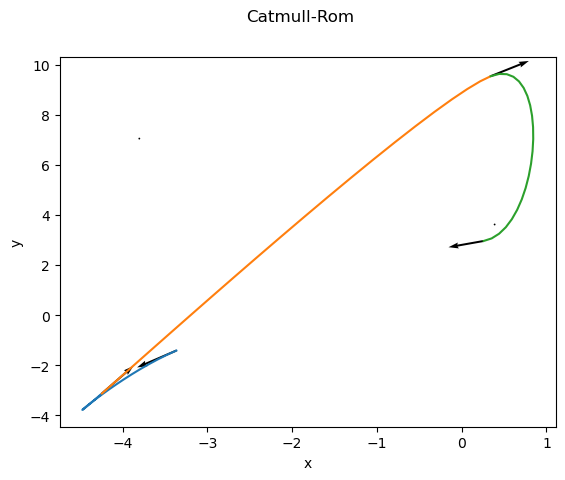

In [34]:
interpolation_count = 22
number_of_points = 6
keyframes_x = 20 * np.random.random_sample(number_of_points) - 10
keyframes_y = 20 * np.random.random_sample(number_of_points) - 10

gradients_x = np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_x[2:], 
                              np.zeros(shape=(1,)))) - np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_x[:-2], 
                              np.zeros(shape=(1,))))
gradients_y = np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_y[2:], 
                              np.zeros(shape=(1,)))) - np.concatenate((np.zeros(shape=(1,)), 
                              keyframes_y[:-2], 
                              np.zeros(shape=(1,))))

s.plot_interpolation_2d(keyframes_x, keyframes_y, gradients_x, gradients_y, s.catmullrom_interpolation_1d(keyframes_x, interpolation_count), s.catmullrom_interpolation_1d(keyframes_y, interpolation_count), "Catmull-Rom")

np.stack((keyframes_x, keyframes_y), axis=1)

In [35]:
np.stack((gradients_x, gradients_y), axis=1)

array([[ 0.        ,  0.        ],
       [-4.63253353, -6.75687425],
       [ 3.70827647, 10.97205944],
       [ 4.50319989,  6.09773777],
       [-4.14504272, -2.49503561],
       [ 0.        ,  0.        ]])

In [37]:
np.array([-3.80321553,  7.06005793]) - np.array([0.34182719,  9.55509353])

array([-4.14504272, -2.4950356 ])